In [2]:
import datetime
import numpy as np

from itertools import islice, cycle
from more_itertools import pairwise

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(17, 9)})

from IPython.core.display import HTML
from IPython.display import display, clear_output
display(HTML('<style>.container { width:80% !important; }</style>'))
display(HTML('<style>.prompt { min-width:10ex !important; }</style>'))
display(HTML('<style>div#notebook { font-size:12px !important; }</style>'))

In [3]:
users_df = pd.read_csv('data_original/users.csv')
items_df = pd.read_csv('data_original/items.csv')
interactions_df = pd.read_csv('data_original/interactions.csv', parse_dates=['last_watch_dt'])

In [4]:
interactions_df.shape

(5476251, 5)

In [5]:
users_df.head()

user_id        age        income sex  kids_flg
0   973171  age_25_34  income_60_90   М         1
1   962099  age_18_24  income_20_40   М         0
2  1047345  age_45_54  income_40_60   Ж         0
3   721985  age_45_54  income_20_40   Ж         0
4   704055  age_35_44  income_60_90   Ж         0

In [6]:
users_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   840197 non-null  int64 
 1   age       826102 non-null  object
 2   income    825421 non-null  object
 3   sex       826366 non-null  object
 4   kids_flg  840197 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB


/tmp/ipykernel_52681/2901919997.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  users_df.info(verbose=True, null_counts=True)


In [7]:
users_df.nunique()

user_id     840197
age              6
income           6
sex              2
kids_flg         2
dtype: int64

<Axes: >

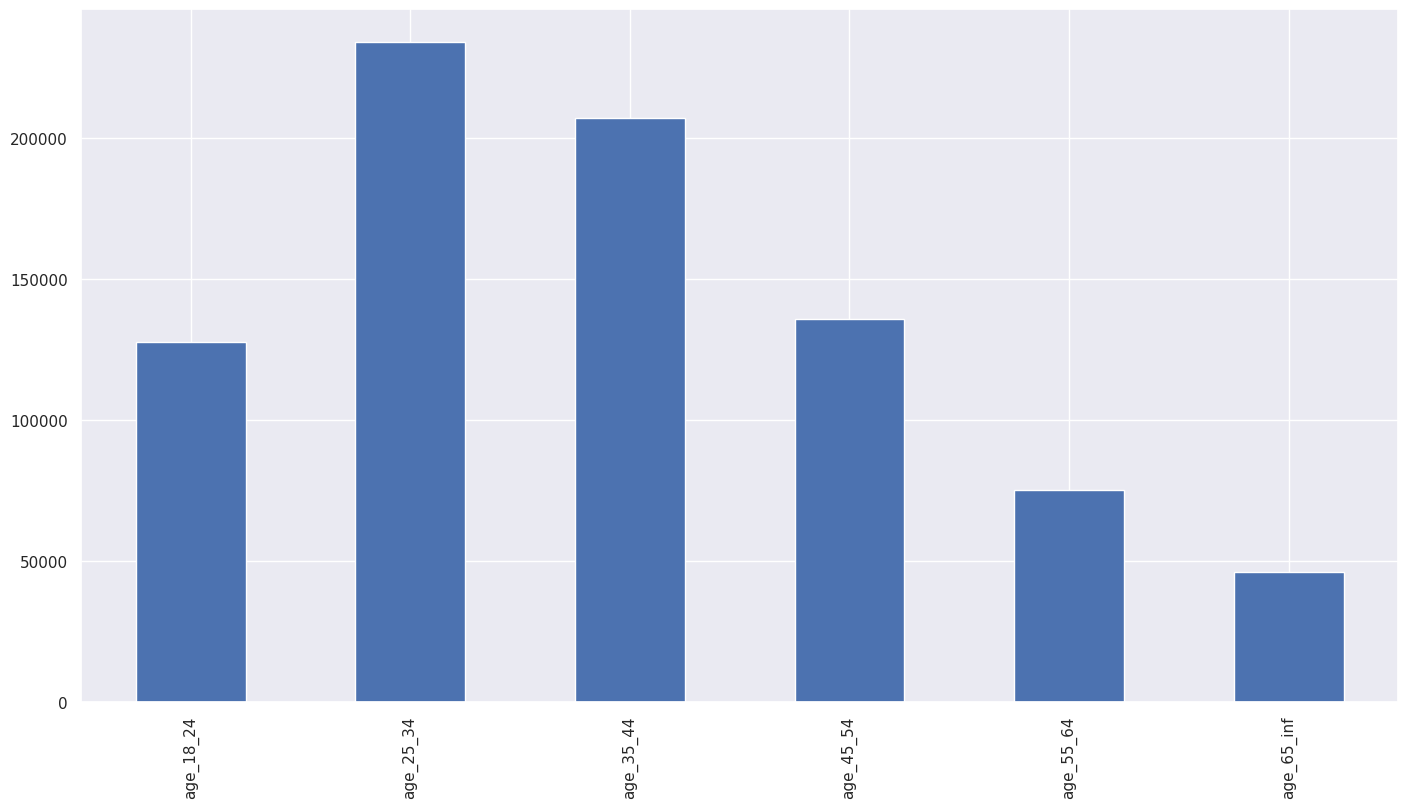

In [8]:
users_df.age.value_counts().sort_index().plot(kind='bar')

In [9]:
users_df['age'] = users_df['age'].fillna('age_unknown')

In [10]:
users_df['age'].value_counts()

age_25_34      233926
age_35_44      207043
age_45_54      135925
age_18_24      127672
age_55_64       75265
age_65_inf      46271
age_unknown     14095
Name: age, dtype: int64

In [11]:
users_df['age'] = users_df['age'].astype('category')

In [12]:
users_df.income.value_counts()

income_20_40      471519
income_40_60      248330
income_60_90       68674
income_0_20        21836
income_90_150      13985
income_150_inf      1077
Name: income, dtype: int64

<Axes: >

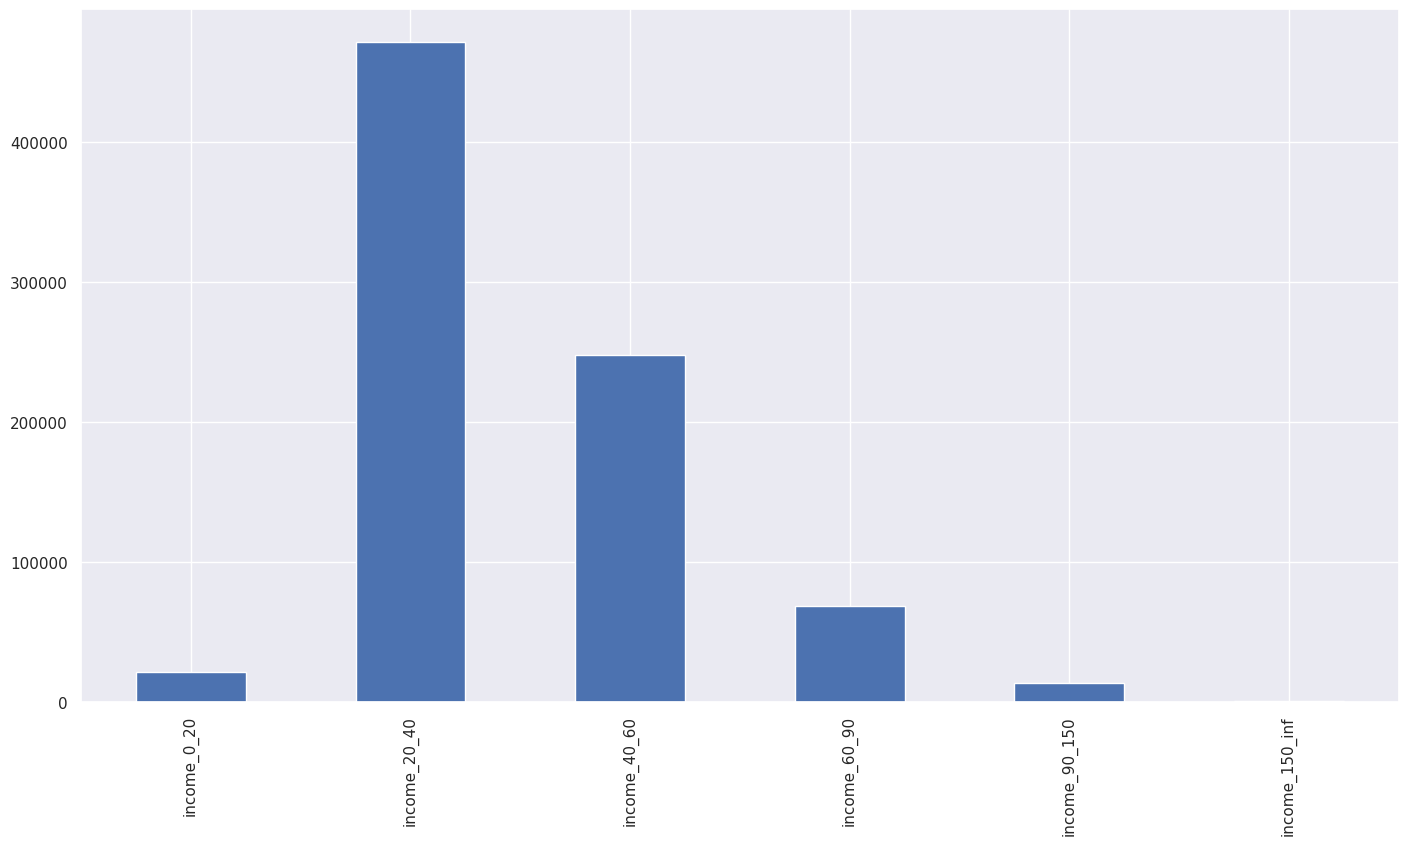

In [13]:
users_df.income.value_counts().iloc[[3,0,1,2,4,5]].plot(kind='bar')

In [14]:
users_df['income'] = users_df['income'].fillna('income_unknown')

In [15]:
users_df['income'].value_counts()

income_20_40      471519
income_40_60      248330
income_60_90       68674
income_0_20        21836
income_unknown     14776
income_90_150      13985
income_150_inf      1077
Name: income, dtype: int64

In [16]:
users_df['income'] = users_df['income'].astype('category')

In [17]:
users_df['sex'].value_counts()

Ж    425270
М    401096
Name: sex, dtype: int64

In [18]:
users_df['sex'] = users_df['sex'].fillna('sex_unknown')

In [19]:
users_df.loc[users_df.sex == 'М', 'sex'] = 'M'
users_df.loc[users_df.sex == 'Ж', 'sex'] = 'F'

In [20]:
users_df['sex'].value_counts()

F              425270
M              401096
sex_unknown     13831
Name: sex, dtype: int64

In [21]:
users_df['sex'] = users_df['sex'].astype('category')

In [22]:
users_df['kids_flg'].value_counts()

0    587209
1    252988
Name: kids_flg, dtype: int64

In [23]:
users_df['kids_flg'] = users_df['kids_flg'].astype('bool')

In [24]:
users_df.duplicated(subset=['user_id'], keep=False).sum()

0

In [25]:
users_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   user_id   840197 non-null  int64   
 1   age       840197 non-null  category
 2   income    840197 non-null  category
 3   sex       840197 non-null  category
 4   kids_flg  840197 non-null  bool    
dtypes: bool(1), category(3), int64(1)
memory usage: 9.6 MB


/tmp/ipykernel_52681/2901919997.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  users_df.info(verbose=True, null_counts=True)


In [26]:
items_df.head(1)

item_id content_type           title      title_orig  release_year  \
0    10711         film  Поговори с ней  Hable con ella        2002.0   

                                    genres countries  for_kids  age_rating  \
0  драмы, зарубежные, детективы, мелодрамы   Испания       NaN        16.0   

  studios         directors  \
0     NaN  Педро Альмодовар   

                                              actors  \
0  Адольфо Фернандес, Ана Фернандес, Дарио Гранди...   

                                         description  \
0  Мелодрама легендарного Педро Альмодовара «Пого...   

                                            keywords  
0  Поговори, ней, 2002, Испания, друзья, любовь, ...

In [27]:
items_df.nunique()

item_id         15963
content_type        2
title           15293
title_orig      10575
release_year      105
genres           2771
countries         687
for_kids            2
age_rating          6
studios            38
directors        7973
actors          12996
description     15619
keywords        15492
dtype: int64

In [28]:
items_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       15963 non-null  int64  
 1   content_type  15963 non-null  object 
 2   title         15963 non-null  object 
 3   title_orig    11218 non-null  object 
 4   release_year  15865 non-null  float64
 5   genres        15963 non-null  object 
 6   countries     15926 non-null  object 
 7   for_kids      566 non-null    float64
 8   age_rating    15961 non-null  float64
 9   studios       1065 non-null   object 
 10  directors     14454 non-null  object 
 11  actors        13344 non-null  object 
 12  description   15961 non-null  object 
 13  keywords      15540 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.7+ MB


/tmp/ipykernel_52681/3045960088.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  items_df.info(verbose=True, null_counts=True)


In [29]:
items_df.content_type.value_counts()

film      12002
series     3961
Name: content_type, dtype: int64

In [30]:
items_df['content_type'] = items_df['content_type'].astype('category')

In [31]:
items_df['title'].head()

0          Поговори с ней
1             Голые перцы
2        Тактическая сила
3                  45 лет
4    Все решает мгновение
Name: title, dtype: object

In [32]:
items_df.duplicated(subset=['title'], keep=False).sum()

1266

In [33]:
items_df['title'] = items_df['title'].str.lower()

In [34]:
items_df['title_orig'].head()

0    Hable con ella
1      Search Party
2    Tactical Force
3          45 Years
4               NaN
Name: title_orig, dtype: object

In [35]:
items_df[items_df.title_orig.isna()].countries.value_counts().head()

Россия            2899
СССР               918
Украина            240
США                101
Великобритания      87
Name: countries, dtype: int64

In [36]:
items_df['title_orig'] = items_df['title_orig'].fillna('None') 

In [37]:
items_df.duplicated(subset=['title_orig'], keep=False).sum()

6007

In [38]:
items_df.duplicated(subset=['title', 'title_orig'], keep=False).sum()

380

<Axes: >

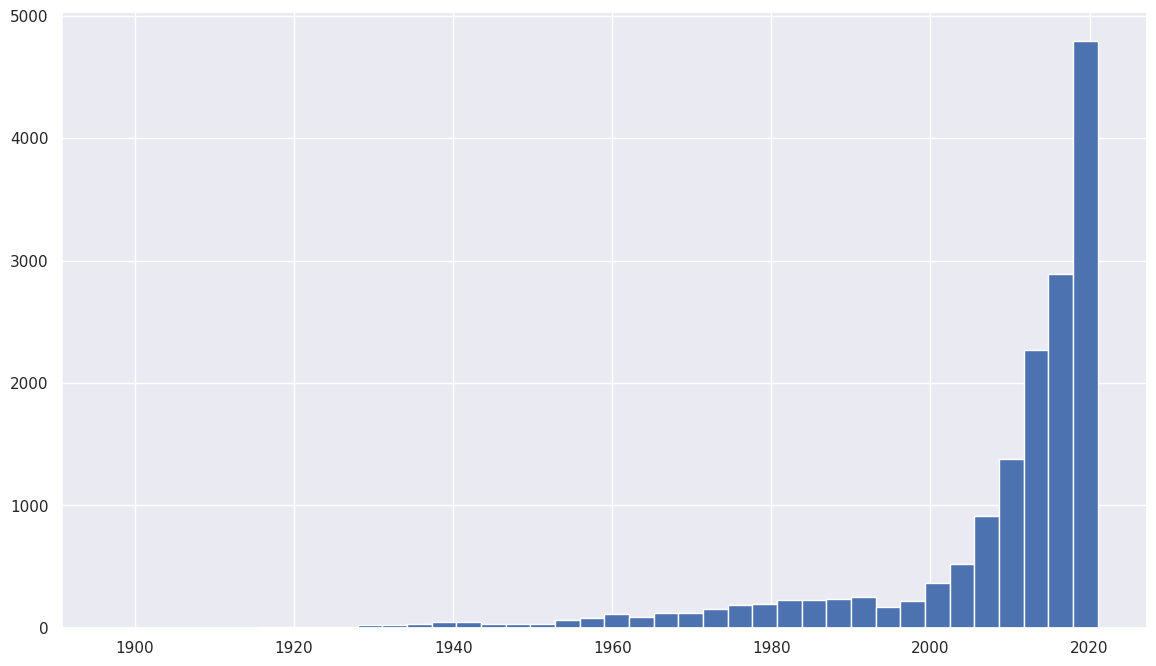

In [39]:
items_df.release_year.hist(figsize=(14, 8), bins=40)

In [40]:
items_df[items_df['release_year'].isna()].head()

item_id content_type                title title_orig  release_year  \
89     10950       series           начни дома       None           NaN   
294     3901       series         красота лица       None           NaN   
374    10656       series  медитации для жизни       None           NaN   
375    11526       series   психология питания       None           NaN   
572    11532       series           йога старт       None           NaN   

            genres countries  for_kids  age_rating studios directors actors  \
89          фитнес    Россия       NaN         6.0     NaN       NaN    NaN   
294         фитнес    Россия       NaN         0.0     NaN       NaN    NaN   
374         фитнес       NaN       NaN         6.0     NaN       NaN    NaN   
375  фитнес, спорт       NaN       NaN         6.0     NaN       NaN    NaN   
572         фитнес    Россия       NaN         6.0     NaN       NaN    NaN   

                                           description  \
89   Приведи себя в хорошую форму дома с минимальны...   
294  Motify научит вас простым, но очень эффективны...   
374  В этой программе собраны 3 базовых урока, на к...   
375  В программе от Motify ты узнаешь о психологиче...   
572  Программа от Motify подойдет для любого уровня...   

                                              keywords  
89   Начни, дома, Россия, спорт-фитнес, спорт-трене...  
294  Красота, лица, 2020, Россия, спорт-фитнес, спо...  
374  Медитации, для, жизни, спорт-фитнес, спорт-тре...  
375                                Психология, питания  
572  Йога, 2020, Россия, спорт-фитнес, спорт-тренер...

In [41]:
items_df[items_df['release_year'].isna()][['age_rating', 'genres', 'countries']].value_counts()

age_rating  genres                                                 countries       
6.0         фитнес                                                 Россия              54
0.0         футбол                                                 Россия              22
            фитнес                                                 Россия               5
            зарубежные, детские песни, развитие, для детей         Республика Корея     1
            зарубежные, для детей, западные мультфильмы, развитие  Республика Корея     1
6.0         фитнес                                                 Великобритания       1
dtype: int64

In [42]:
items_df.loc[items_df['release_year'].isna(), 'release_year'] = 2020.

In [43]:
items_df.loc[items_df['release_year'] < 1920, 'release_year_cat'] = 'inf_1920'
items_df.loc[items_df['release_year'] >= 2020, 'release_year_cat'] = '2020_inf'

In [44]:
for i in range (1920, 2020, 10):
    items_df.loc[(items_df['release_year'] >= i) & (items_df['release_year'] < i+10), 'release_year_cat'] = f'{i}-{i+10}'

In [45]:
items_df.release_year_cat.value_counts()

2010-2020    8788
2020_inf     2276
2000-2010    2168
1980-1990     745
1990-2000     636
1970-1980     553
1960-1970     342
1950-1960     199
1940-1950     117
1930-1940     104
1920-1930      24
inf_1920       11
Name: release_year_cat, dtype: int64

In [46]:
items_df = items_df.drop(columns=['release_year'])
items_df['release_year_cat'] = items_df['release_year_cat'].astype('category')

In [47]:
items_df.genres.value_counts()

документальное                                                             816
драмы                                                                      719
комедии                                                                    564
для взрослых                                                               482
русские, мелодрамы                                                         416
                                                                          ... 
драмы, зарубежные, спорт, семейное, комедии                                  1
музыкальные, драмы, зарубежные, семейное, комедии                            1
приключения, полнометражные, зарубежные, семейное, западные мультфильмы      1
детективы, приключения, зарубежные, триллеры, ужасы                          1
фэнтези, семейное, криминал, комедии                                         1
Name: genres, Length: 2771, dtype: int64

In [48]:
items_df['genres'] = items_df['genres'].astype('category')

In [49]:
items_df.countries.value_counts()

Россия                                                                  4237
США                                                                     4090
СССР                                                                    1401
Франция                                                                 1158
Великобритания                                                           718
                                                                        ... 
Франция, Китай                                                             1
Мальта                                                                     1
Великобритания, Ирландия, Канада, США, Индия                               1
Швеция, Германия, Норвегия, Дания, Исландия, Бельгия, Великобритания       1
Финляндия, Германия                                                        1
Name: countries, Length: 687, dtype: int64

In [50]:
items_df[items_df.countries.isna()].shape

(37, 14)

In [51]:
items_df[items_df.countries.isna()].head()

item_id content_type                              title title_orig  \
374     10656       series                медитации для жизни       None   
375     11526       series                 психология питания       None   
573        63       series                  пробуди силу духа       None   
750     11551       series               растяжка для кaждого       None   
1960    16014       series  работа с телом для молодости лица       None   

             genres countries  for_kids  age_rating studios directors actors  \
374          фитнес       NaN       NaN         6.0     NaN       NaN    NaN   
375   фитнес, спорт       NaN       NaN         6.0     NaN       NaN    NaN   
573   фитнес, спорт       NaN       NaN         6.0     NaN       NaN    NaN   
750   фитнес, спорт       NaN       NaN         6.0     NaN       NaN    NaN   
1960  фитнес, спорт       NaN       NaN         6.0     NaN       NaN    NaN   

                                            description  \
374   В этой программе собраны 3 базовых урока, на к...   
375   В программе от Motify ты узнаешь о психологиче...   
573   Три коротких и энергичных класса Кундалини йог...   
750   Программа от Motify поможет вам почувствовать ...   
1960  Программа от Motify направлена на работу с тел...   

                                               keywords release_year_cat  
374   Медитации, для, жизни, спорт-фитнес, спорт-тре...         2020_inf  
375                                 Психология, питания         2020_inf  
573   Пробуди, силу, Духа, 2021, спорт-фитнес, спорт...         2020_inf  
750                              Растяжка, для, кaждого         2020_inf  
1960                Работа, телом, для, молодости, лица         2020_inf

In [52]:
items_df.loc[items_df.countries.isna(), 'countries'] = 'Россия'

In [53]:
items_df['countries'] = items_df['countries'].str.lower()
items_df['countries'] = items_df['countries'].apply(lambda x: ', '.join(sorted(list(set(x.split(', '))))))

In [54]:
items_df.countries.value_counts().head(10)

россия                 4274
сша                    4090
ссср                   1401
франция                1158
великобритания          718
украина                 340
италия                  256
канада                  233
республика корея        230
великобритания, сша     193
Name: countries, dtype: int64

In [55]:
items_df['countries'] = items_df['countries'].astype('category')

In [56]:
items_df['for_kids'].value_counts()

0.0    452
1.0    114
Name: for_kids, dtype: int64

In [57]:
items_df['for_kids'] = items_df['for_kids'].fillna(0)

In [58]:
items_df['for_kids'] = items_df['for_kids'].astype('bool')

In [59]:
items_df.age_rating.value_counts()

16.0    5729
12.0    4147
18.0    2547
6.0     1538
0.0     1518
21.0     482
Name: age_rating, dtype: int64

In [60]:
items_df[items_df.age_rating.isna()]

item_id content_type             title title_orig  \
8297      6316       series  машины-помощники       None   
12352    14409       series            бибабу       None   

                                                  genres countries  for_kids  \
8297   русские, для детей, сериалы, хочу всё знать, р...    россия     False   
12352  русские, сериалы, для детей, хочу всё знать, р...    россия     False   

       age_rating studios directors actors  \
8297          NaN     NaN       NaN    NaN   
12352         NaN     NaN       NaN    NaN   

                                             description  \
8297   Маленькие мальчики всего мира любят играть в м...   
12352  В сказочное подводное царство приглашают мален...   

                                                keywords release_year_cat  
8297   Машины-помощники, 2017, Россия, работа, преодо...        2010-2020  
12352  друзья, магия и волшебство, рыбы, моря и океан...        2010-2020

In [61]:
items_df.loc[items_df.age_rating.isna(), 'age_rating'] = 0

In [62]:
items_df['age_rating'] = items_df['age_rating'].astype('category')

In [63]:
items_df['studios'] = items_df['studios'].fillna('Unknown')

In [64]:
items_df['studios'] = items_df['studios'].str.lower()
items_df['studios'] = items_df['studios'].apply(lambda x: ', '.join(sorted(list(set(x.split(', '))))))

In [65]:
items_df['studios'] = items_df['studios'].astype('category')

In [66]:
items_df['directors'] = items_df['directors'].fillna('Unknown')
items_df['directors'] = items_df['directors'].str.lower()
items_df['directors'] = items_df['directors'].astype('category')

In [67]:
items_df['actors'] = items_df['actors'].fillna('Unknown')
items_df['actors'] = items_df['actors'].astype('category')

In [68]:
items_df['keywords'].head()

0    Поговори, ней, 2002, Испания, друзья, любовь, ...
1    Голые, перцы, 2014, США, друзья, свадьбы, прео...
2    Тактическая, сила, 2011, Канада, бандиты, ганг...
3    45, лет, 2015, Великобритания, брак, жизнь, лю...
4    Все, решает, мгновение, 1978, СССР, сильные, ж...
Name: keywords, dtype: object

In [69]:
items_df['keywords'] = items_df['keywords'].fillna('Unknown')

In [70]:
items_df['keywords'] = items_df['keywords'].astype('category')

In [71]:
items_df['description'] = items_df['description'].fillna('-')

In [72]:
items_df.duplicated(subset=['item_id'], keep=False).sum()

0

In [73]:
items_df.duplicated(subset=['title'], keep=False).sum()

1300

In [74]:
items_df[items_df.duplicated(subset=['content_type', 'countries', 'title', 'directors'], keep=False)].sort_values('title')[['content_type', 'title', 'countries', 'for_kids', 'directors']].head()

content_type                title   countries  for_kids     directors
7333          film  пираты по соседству  нидерланды     False  пим ван хёве
12757         film  пираты по соседству  нидерланды     False  пим ван хёве

In [75]:
items_df.duplicated(subset=['content_type', 'countries', 'title', 'directors'], keep=False).sum()

2

In [76]:
items_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   item_id           15963 non-null  int64   
 1   content_type      15963 non-null  category
 2   title             15963 non-null  object  
 3   title_orig        15963 non-null  object  
 4   genres            15963 non-null  category
 5   countries         15963 non-null  category
 6   for_kids          15963 non-null  bool    
 7   age_rating        15963 non-null  category
 8   studios           15963 non-null  category
 9   directors         15963 non-null  category
 10  actors            15963 non-null  category
 11  description       15963 non-null  object  
 12  keywords          15963 non-null  category
 13  release_year_cat  15963 non-null  category
dtypes: bool(1), category(9), int64(1), object(3)
memory usage: 2.4+ MB


/tmp/ipykernel_52681/3045960088.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  items_df.info(verbose=True, null_counts=True)


In [77]:
interactions_df.head()

user_id  item_id last_watch_dt  total_dur  watched_pct
0   176549     9506    2021-05-11       4250         72.0
1   699317     1659    2021-05-29       8317        100.0
2   656683     7107    2021-05-09         10          0.0
3   864613     7638    2021-07-05      14483        100.0
4   964868     9506    2021-04-30       6725        100.0

In [78]:
print(f'Data date range: {interactions_df.last_watch_dt.min().date()} - {interactions_df.last_watch_dt.max().date()}')

Data date range: 2021-03-13 - 2021-08-22


In [79]:
interactions_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        5476251 non-null  int64         
 1   item_id        5476251 non-null  int64         
 2   last_watch_dt  5476251 non-null  datetime64[ns]
 3   total_dur      5476251 non-null  int64         
 4   watched_pct    5475423 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 208.9 MB


/tmp/ipykernel_52681/109649125.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  interactions_df.info(null_counts=True, verbose=True)


In [80]:
interactions_df.watched_pct.max()

100.0

In [81]:
interactions_df.watched_pct.min()

0.0

In [82]:
interactions_df['watched_pct'] = interactions_df['watched_pct'].astype(pd.Int8Dtype())

In [83]:
interactions_df['watched_pct'] = interactions_df['watched_pct'].fillna(0)

<Axes: >

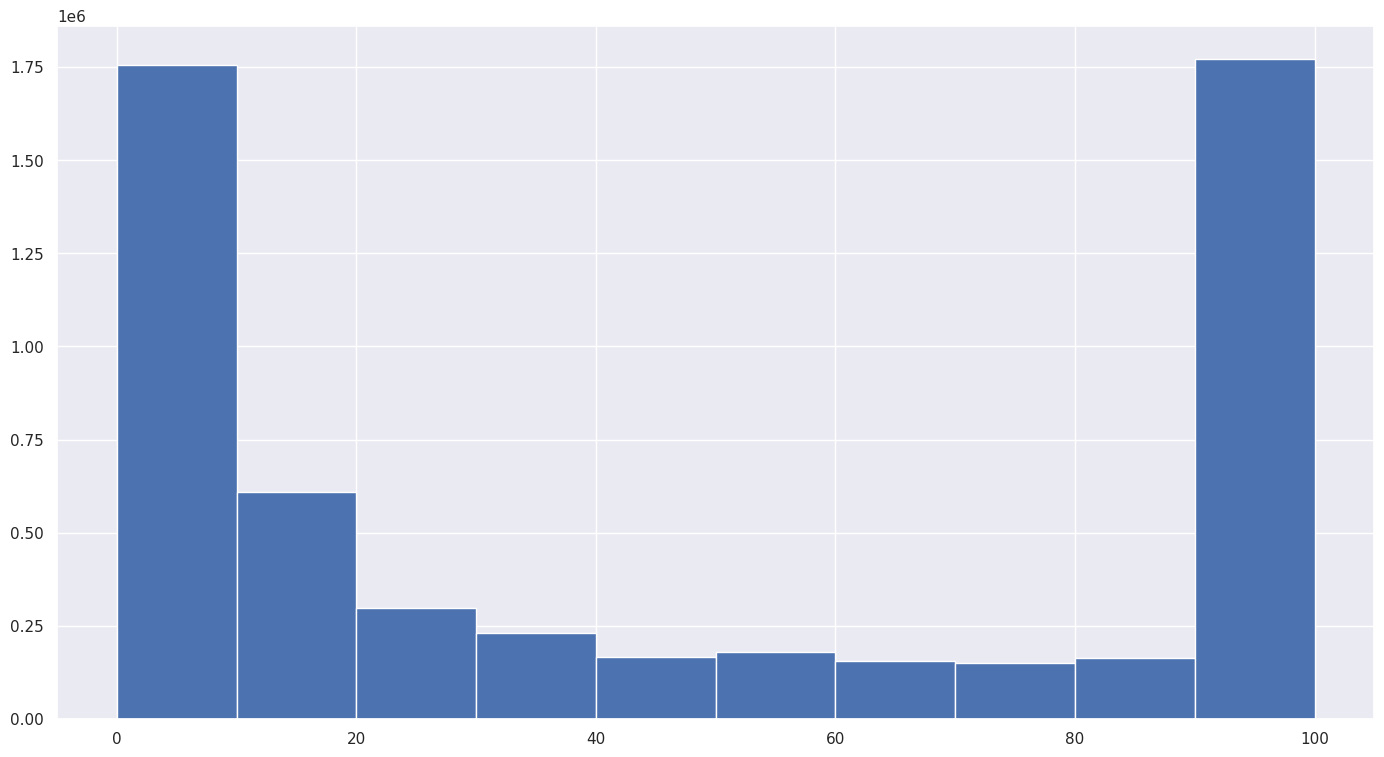

In [84]:
interactions_df['watched_pct'].hist()

<Axes: >

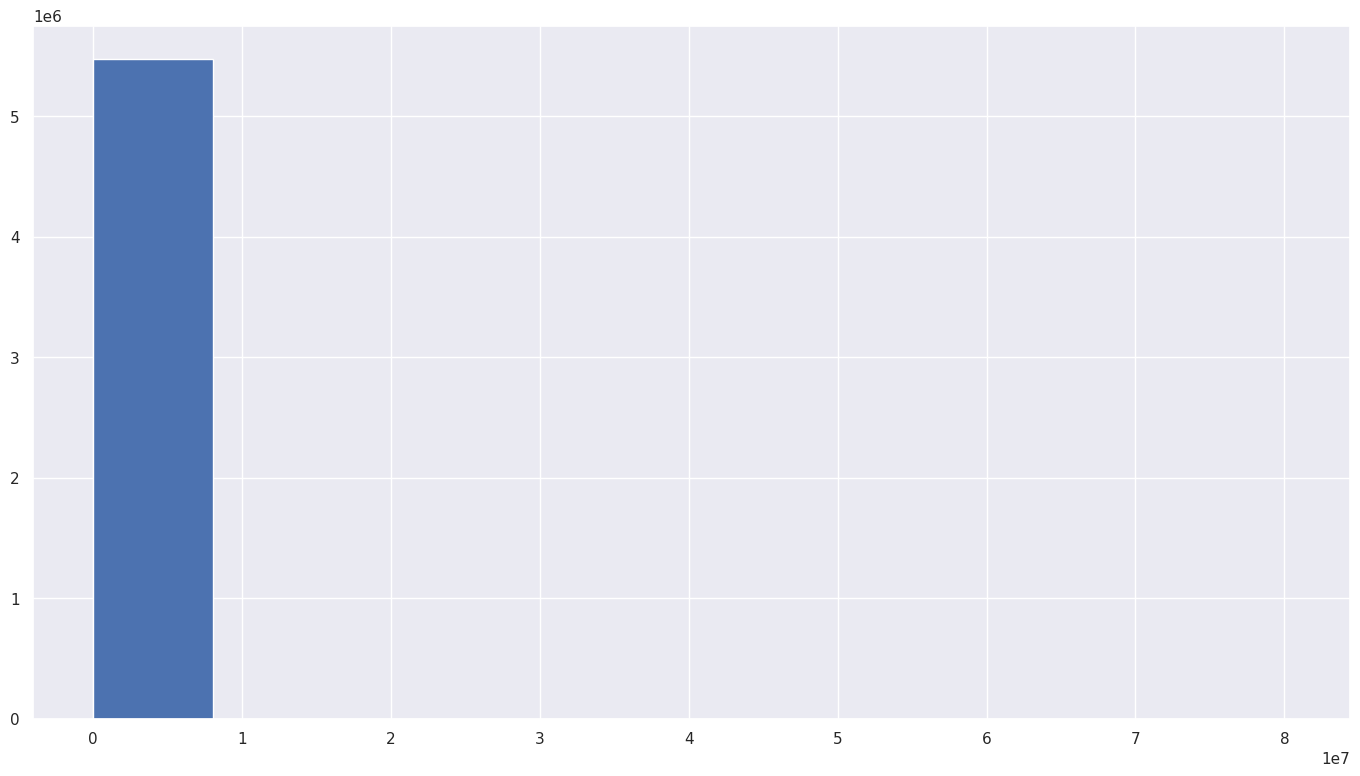

In [85]:
interactions_df['total_dur'].hist()

In [86]:
interactions_df[interactions_df['total_dur'] > 200000].shape

(16042, 5)

<Axes: >

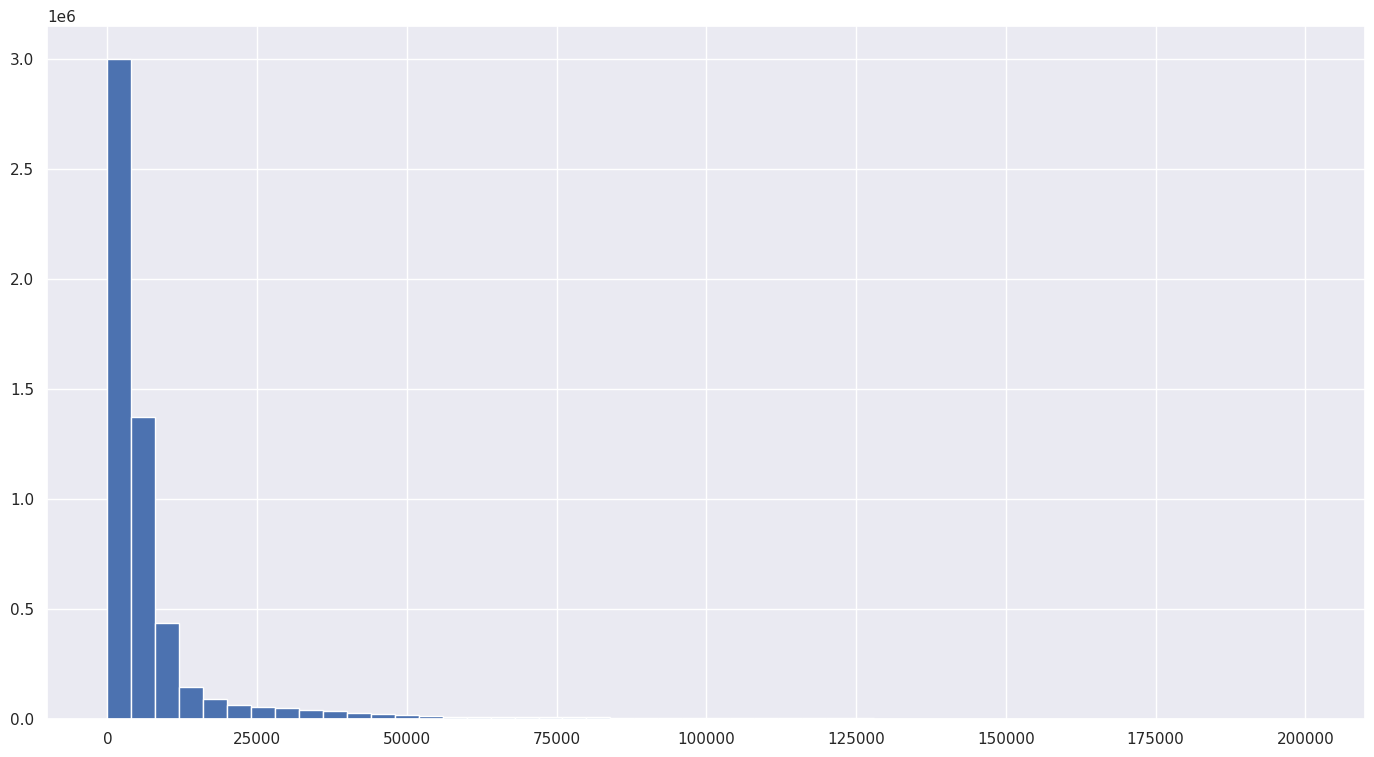

In [87]:
interactions_df[interactions_df['total_dur'] < 200000].total_dur.hist(bins=50)

In [88]:
interactions_df['last_watch_dt'] = pd.to_datetime(interactions_df['last_watch_dt'])

In [89]:
interactions_df['last_watch_dt'].min()

Timestamp('2021-03-13 00:00:00')

In [90]:
interactions_df['last_watch_dt'].max()

Timestamp('2021-08-22 00:00:00')

<Axes: >

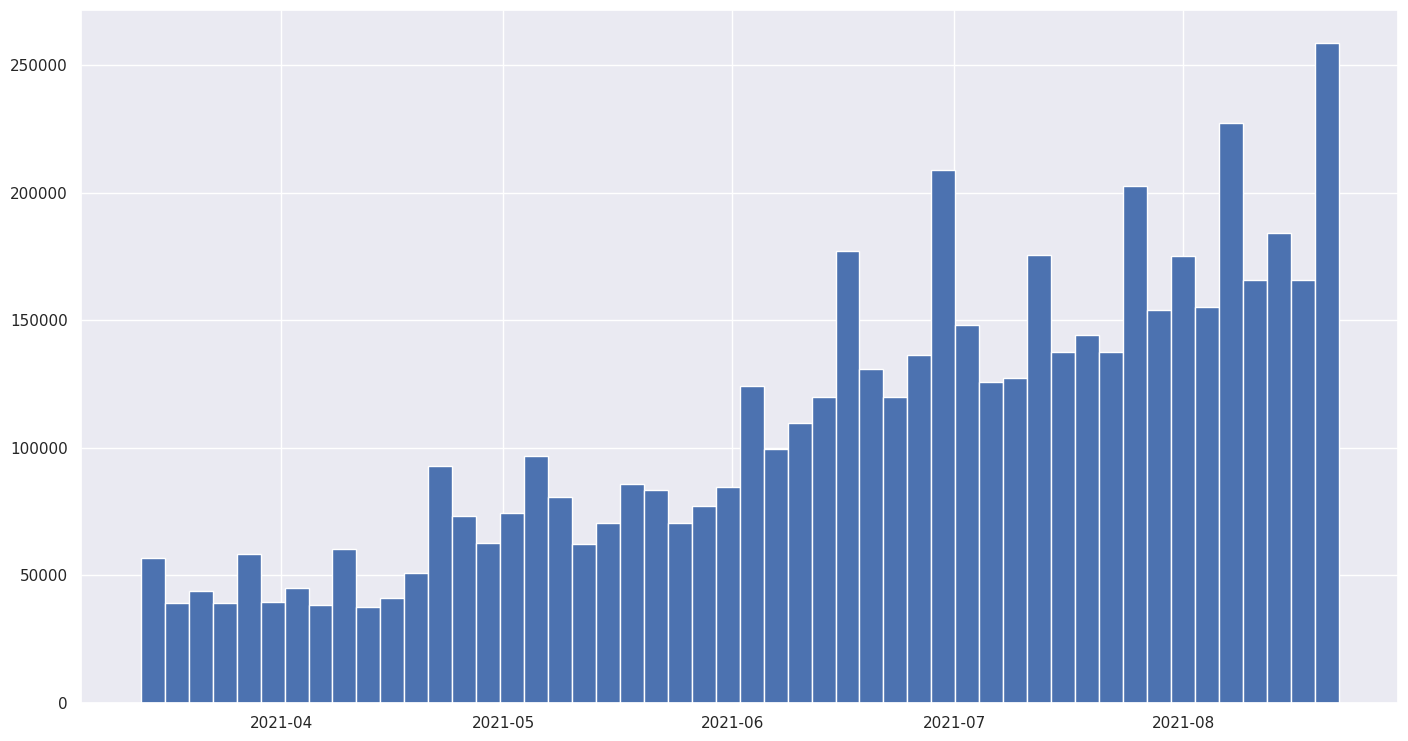

In [91]:
interactions_df['last_watch_dt'].hist(bins=50)

In [92]:
interactions_df.duplicated(subset=['user_id', 'item_id'], keep=False).sum()

0

In [93]:
interactions_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        5476251 non-null  int64         
 1   item_id        5476251 non-null  int64         
 2   last_watch_dt  5476251 non-null  datetime64[ns]
 3   total_dur      5476251 non-null  int64         
 4   watched_pct    5476251 non-null  Int8          
dtypes: Int8(1), datetime64[ns](1), int64(3)
memory usage: 177.6 MB


/tmp/ipykernel_52681/109649125.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  interactions_df.info(null_counts=True, verbose=True)


In [94]:
interaction_users = interactions_df['user_id'].unique()

common_users = len(np.intersect1d(interaction_users, users_df['user_id']))
users_only_in_interaction = len(np.setdiff1d(interaction_users, users_df['user_id']))
users_only_features = len(np.setdiff1d(users_df['user_id'], interaction_users))
total_users = common_users + users_only_in_interaction + users_only_features

print(f'Кол-во пользователей всего - {total_users}')
print(f'Кол-во пользователей c взаимодействиями и фичами - {common_users} ({common_users / total_users:.2%})')
print(f'Кол-во пользователей только c взаимодействиями - {users_only_in_interaction} ({users_only_in_interaction / total_users:.2%})')
print(f'Кол-во пользователей только c фичами - {users_only_features} ({users_only_features / total_users:.2%})')

Кол-во пользователей всего - 1058088
Кол-во пользователей c взаимодействиями и фичами - 744288 (70.34%)
Кол-во пользователей только c взаимодействиями - 217891 (20.59%)
Кол-во пользователей только c фичами - 95909 (9.06%)


In [95]:
interaction_items = interactions_df['item_id'].unique()

common_items = len(np.intersect1d(interaction_items, items_df['item_id']))
items_only_in_interaction = len(np.setdiff1d(interaction_items, items_df['item_id']))
items_only_features = len(np.setdiff1d(items_df['item_id'], interaction_items))
total_items = common_items + items_only_in_interaction + items_only_features
print(f'Кол-во объектов всего - {total_items}')
print(f'Кол-во объектов c взаимодействиями и фичами - {common_items} ({common_items / total_items:.2%})')
print(f'Кол-во объектов только c взаимодействиями - {items_only_in_interaction} ({items_only_in_interaction / total_items:.2%})')
print(f'Кол-во объектов только c фичами - {items_only_features} ({items_only_features / total_items:.2%})')

Кол-во объектов всего - 15963
Кол-во объектов c взаимодействиями и фичами - 15706 (98.39%)
Кол-во объектов только c взаимодействиями - 0 (0.00%)
Кол-во объектов только c фичами - 257 (1.61%)


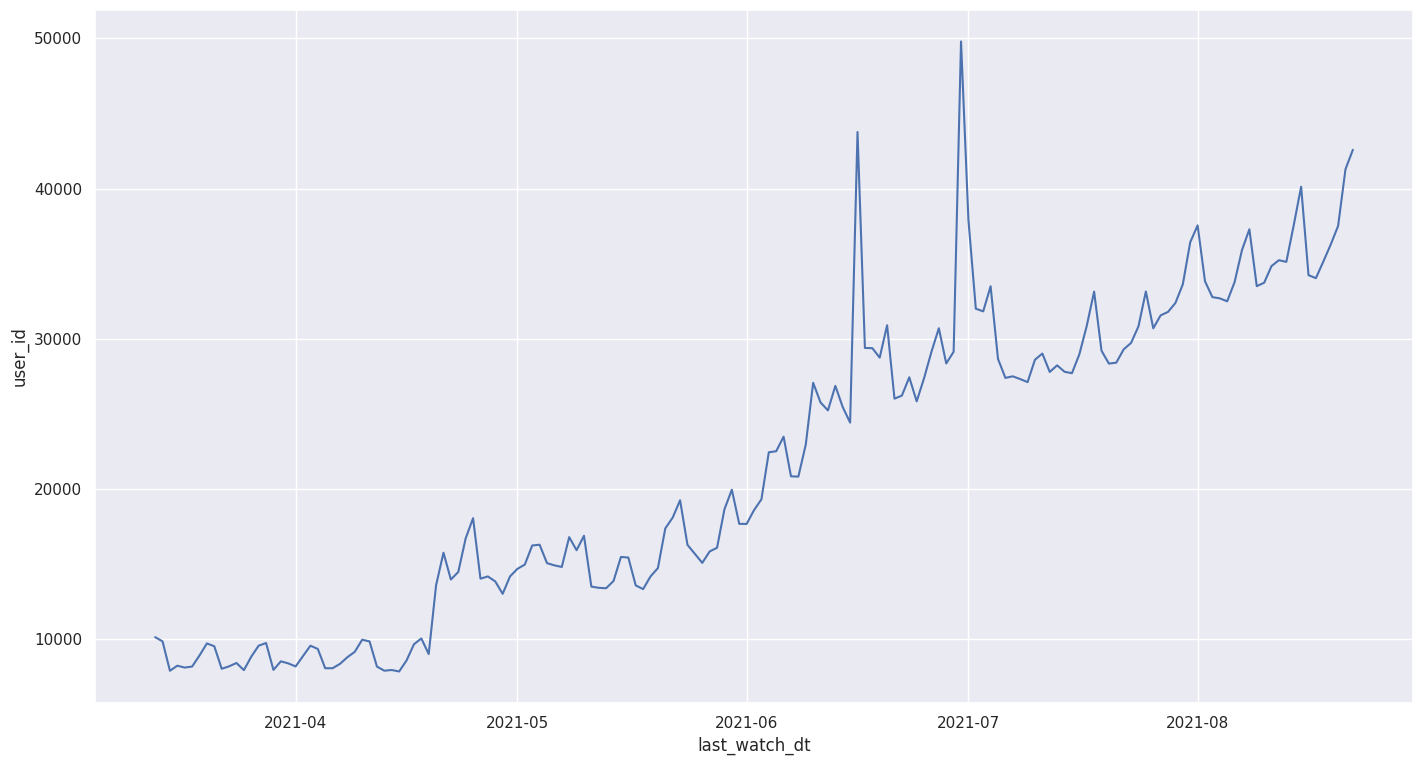

In [96]:
interactions_df_users_count = interactions_df.groupby('last_watch_dt').agg({'user_id': pd.Series.nunique}).reset_index().sort_values('last_watch_dt')
sns.lineplot(data=interactions_df_users_count, x='last_watch_dt', y='user_id');

In [97]:
interactions_df_unique_users_count = []
unique_users = set()

for date in sorted(interactions_df.last_watch_dt.unique()):
    date_unique_users = interactions_df[interactions_df.last_watch_dt == date].user_id.unique()
    interactions_df_unique_users_count.append((date, len(set(date_unique_users) - unique_users)))
    unique_users = unique_users.union(set(date_unique_users))

<Axes: xlabel='date', ylabel='count'>

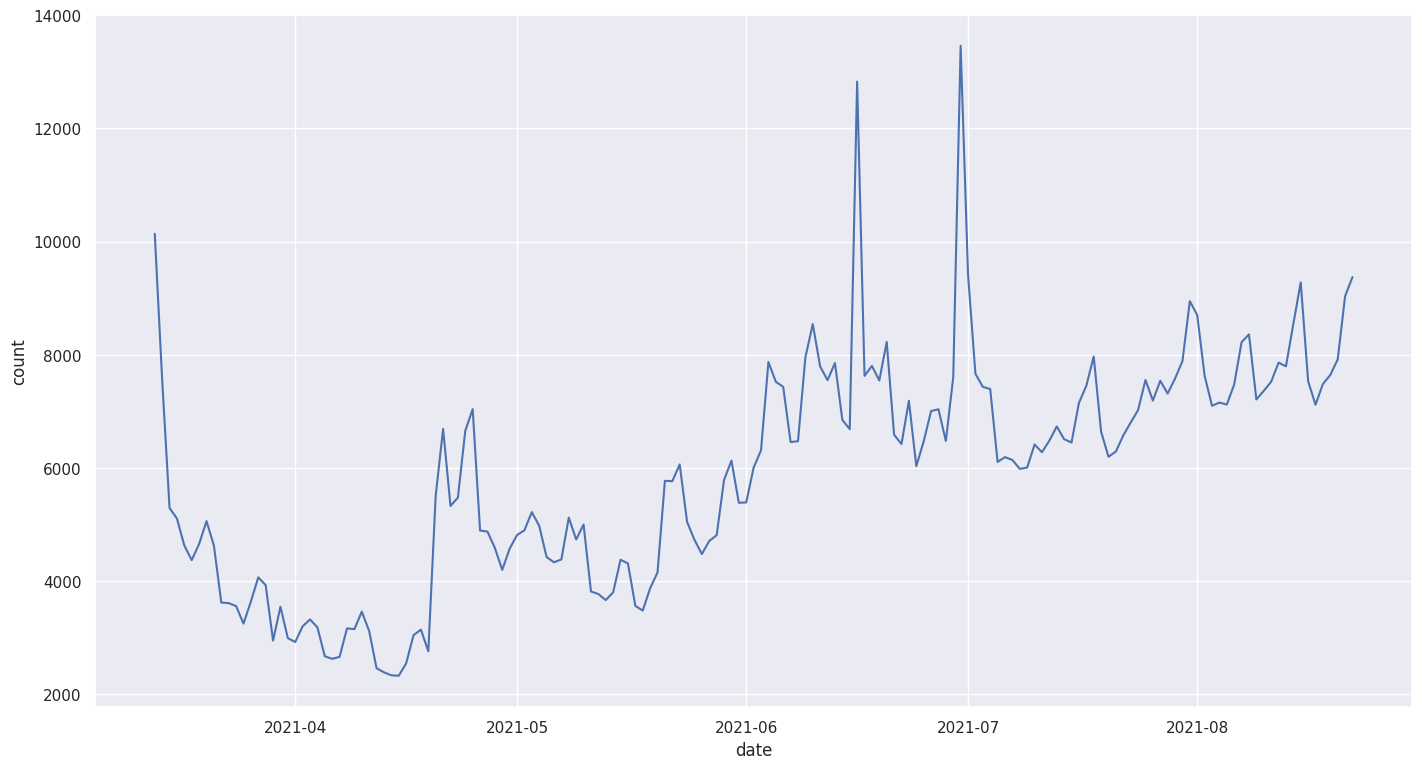

In [98]:
sns.lineplot(data=pd.DataFrame(interactions_df_unique_users_count, columns=['date', 'count']), x='date', y='count') 

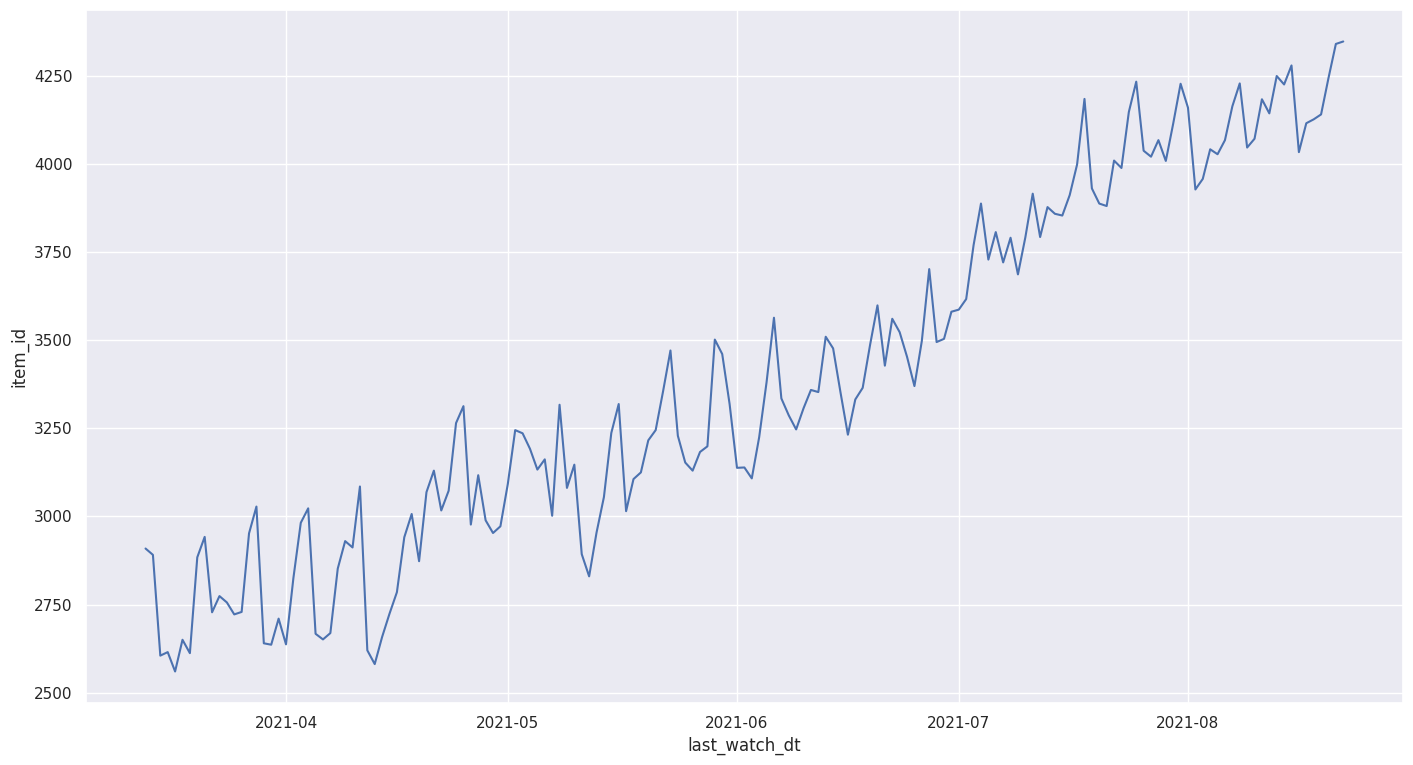

In [99]:
interactions_df_items_count = interactions_df.groupby('last_watch_dt').agg({'item_id': pd.Series.nunique}).reset_index().sort_values('last_watch_dt')
sns.lineplot(data=interactions_df_items_count, x='last_watch_dt', y='item_id');

In [100]:
interactions_df_unique_items_count = []
unique_items = set()

for date in sorted(interactions_df.last_watch_dt.unique()):
    date_unique_items = interactions_df[interactions_df.last_watch_dt == date].item_id.unique()
    interactions_df_unique_items_count.append((date, len(set(date_unique_items) - unique_items)))
    unique_items = unique_items.union(set(date_unique_items))
    
interactions_df_unique_items_count = pd.DataFrame(interactions_df_unique_items_count, columns=['date', 'count'])

<Axes: xlabel='date', ylabel='count'>

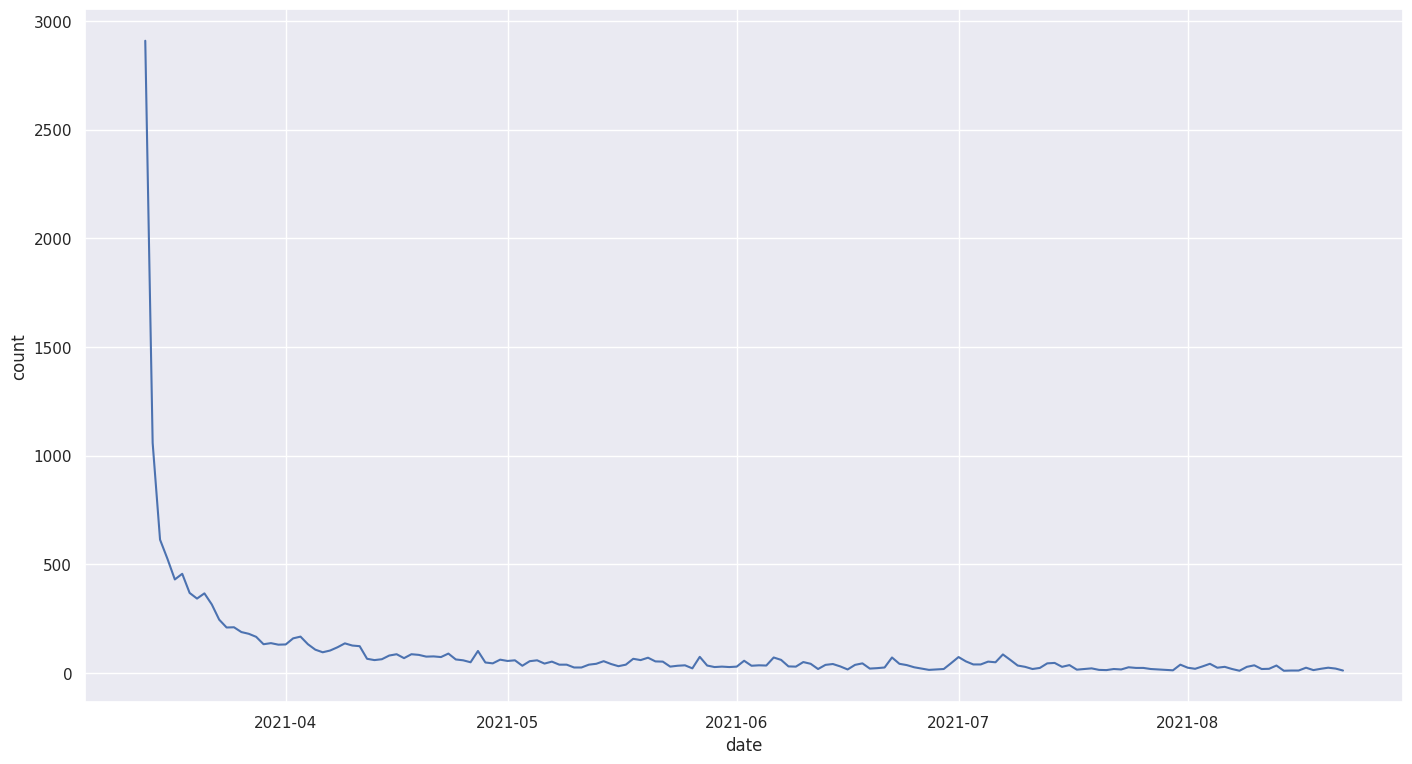

In [101]:
sns.lineplot(data=interactions_df_unique_items_count, x='date', y='count') 

<Axes: xlabel='date', ylabel='count'>

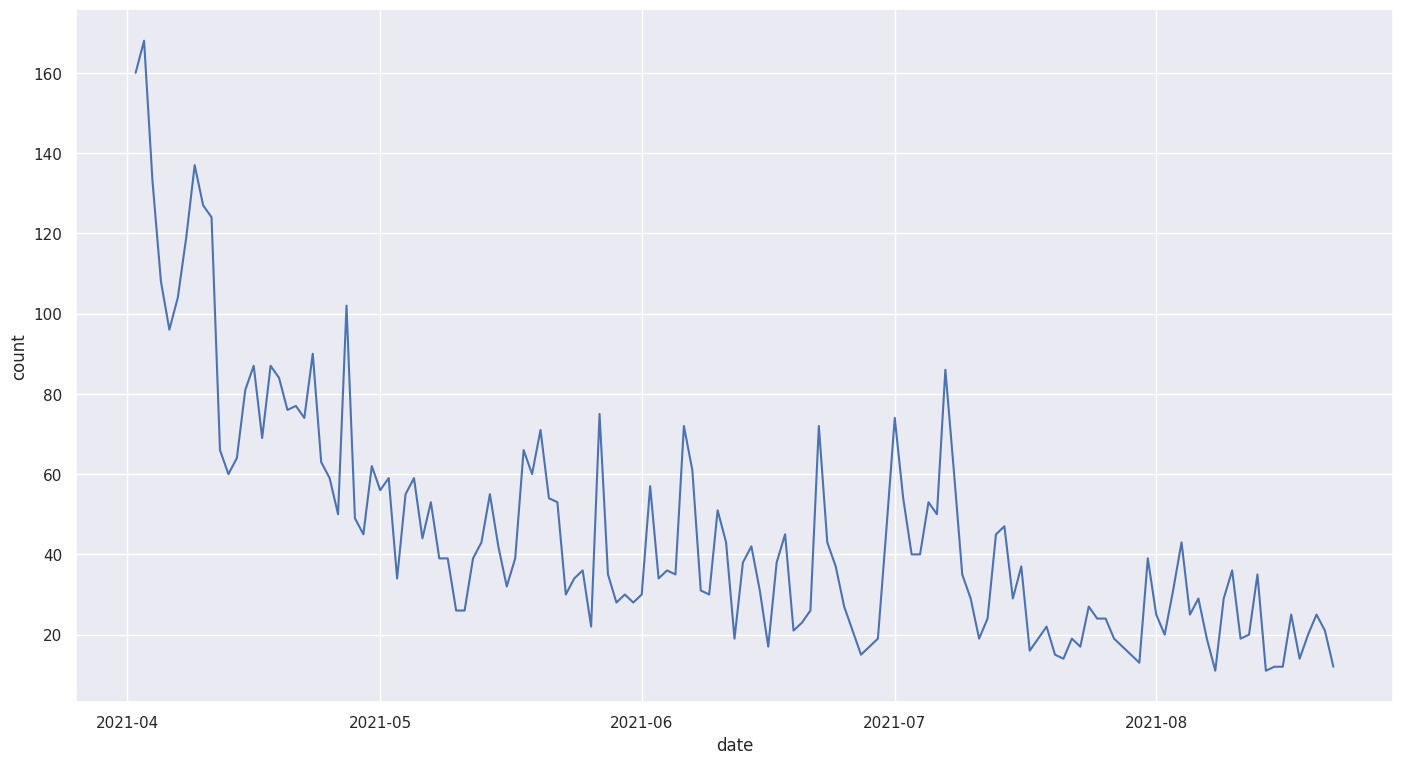

In [102]:
sns.lineplot(data=interactions_df_unique_items_count[interactions_df_unique_items_count.date > '2021-04-01'], x='date', y='count') 

In [103]:
interactions_df.user_id.nunique()

962179

In [104]:
users_df.to_csv('data_original/users_processed_kion.csv', index=False)
items_df.to_csv('data_original/items_processed_kion.csv', index=False)
interactions_df.to_csv('data_original/interactions_processed_kion.csv', index=False)